In [5]:
# Install the pandas library
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
#Importando bibliotecas

#Manipulacao de dados
import numpy as np
import pandas as pd

#Visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf
import plotly.graph_objects as go

In [102]:
stock = yf.Ticker('MGLU3.SA')
dados_df =  stock.history(period='1y')[['Open', 'High', 'Low', 'Close', 'Volume']]  

In [103]:
dados_df = dados_df.reset_index(level=0)

In [104]:
dados_df.head()

,Date,Open,High,Low,Close,Volume
0,2021-07-01,21.204622,21.254586,20.405202,20.675007,18162800
1,2021-07-02,20.784926,21.674282,20.744956,21.624317,24246800
2,2021-07-05,21.484420,21.584348,21.114687,21.364506,8716100
3,2021-07-06,21.139999,21.430000,20.950001,21.070000,19834500
4,2021-07-07,21.299999,22.150000,21.280001,22.010000,30825300


In [105]:
dados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    250 non-null    datetime64[ns]
 1   Open    250 non-null    float64       
 2   High    250 non-null    float64       
 3   Low     250 non-null    float64       
 4   Close   250 non-null    float64       
 5   Volume  250 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.8 KB


In [23]:
dados_df.describe()

,Open,High,Low,Close,Volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,10.150736,10.395413,9.847099,10.070175,9.645096e+07
std,6.326513,6.399288,6.213021,6.307946,5.927731e+07
min,2.340000,2.340000,2.200000,2.200000,0.000000e+00
25%,5.910000,6.090000,5.722500,5.875000,3.617918e+07
50%,6.810000,7.010000,6.605000,6.770000,9.559290e+07
75%,14.757500,15.035000,14.282500,14.557500,1.413761e+08
max,23.900000,24.570000,23.809999,23.900000,2.696417e+08


Series Temporais

In [107]:
dados = dados_df.set_index('Date')

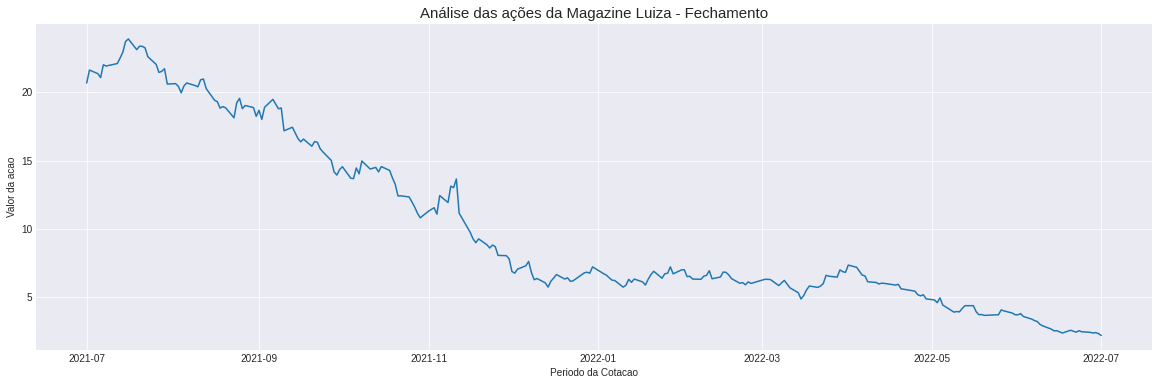

In [40]:
plt.figure(figsize = (20,6))
plt.style.use('seaborn-darkgrid')
plt.plot(dados.index, dados['Close'])
plt.title('Análise das ações da Magazine Luiza - Fechamento', fontsize=15, loc='Center')
plt.xlabel('Periodo da Cotacao')
plt.ylabel('Valor da acao');

In [41]:
dados.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-27,2.48,2.55,2.40,2.43,105534800
2022-06-28,2.46,2.48,2.34,2.38,130244600
2022-06-29,2.40,2.49,2.37,2.41,113299200
2022-06-30,2.38,2.42,2.31,2.34,231980300
2022-07-01,2.34,2.34,2.20,2.20,112229100


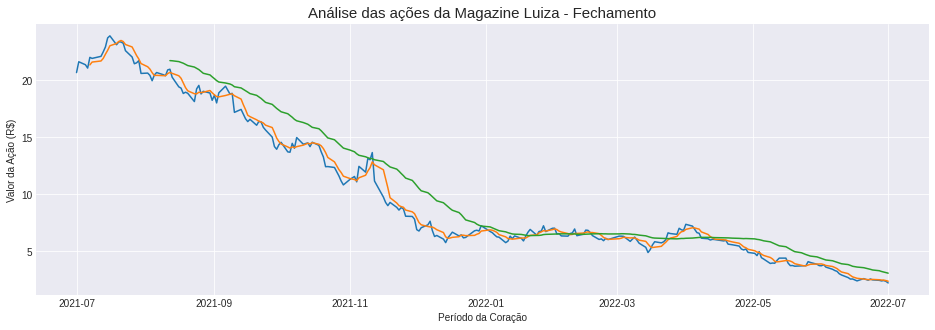

In [44]:
mm = dados['Close'].rolling(5).mean()
mt = dados['Close'].rolling(30).mean()

plt.style.use('seaborn-darkgrid')
plt.figure( figsize=(16, 5) )
plt.title('Análise das ações da Magazine Luiza - Fechamento', fontsize=15, loc='Center')

plt.plot( dados.index, dados['Close'] )
plt.plot( dados.index, mm )
plt.plot( dados.index, mt )

plt.xlabel('Período da Coração')
plt.ylabel('Valor da Ação (R$)');

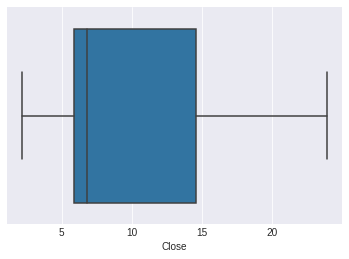

In [45]:
sns.boxplot( data=dados, x='Close')

In [112]:
dados

,Open,High,Low,Close,Volume
Date,,,,,
2021-07-01,21.204622,21.254586,20.405202,20.675007,18162800
2021-07-02,20.784926,21.674282,20.744956,21.624317,24246800
2021-07-05,21.484420,21.584348,21.114687,21.364506,8716100
2021-07-06,21.139999,21.430000,20.950001,21.070000,19834500
2021-07-07,21.299999,22.150000,21.280001,22.010000,30825300
...,...,...,...,...,...
2022-06-27,2.480000,2.550000,2.400000,2.430000,105534800
2022-06-28,2.460000,2.480000,2.340000,2.380000,130244600
2022-06-29,2.400000,2.490000,2.370000,2.410000,113299200


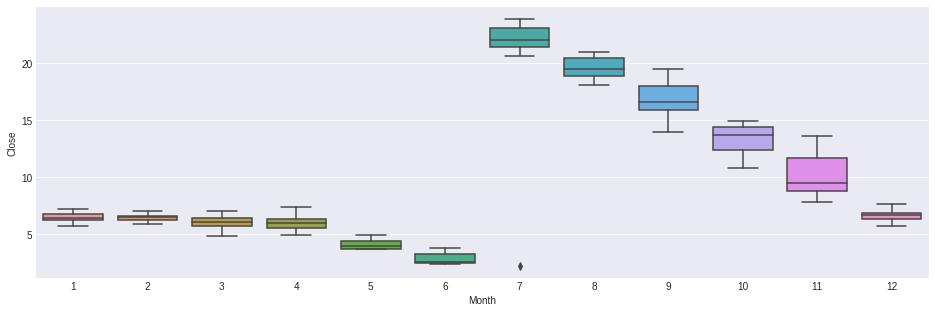

In [114]:
# Boxplot Mensal 

dados_df['Month'] = dados_df['Date'].dt.month

plt.figure( figsize=(16, 5) )
sns.boxplot(data=dados_df, x='Month', y='Close');

In [124]:
dados_df.groupby(['Month']).describe()['Close']

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,21.0,6.439048,0.387813,5.740000,6.220000,6.390000,6.720000,7.220000
2,19.0,6.441053,0.324087,5.910000,6.215000,6.480000,6.615000,7.010000
3,22.0,6.055000,0.557561,4.870000,5.742500,6.025000,6.430000,7.000000
4,19.0,5.980000,0.702195,4.880000,5.495000,5.970000,6.345000,7.350000
5,22.0,4.073182,0.379139,3.670000,3.722500,3.945000,4.360000,4.950000
6,21.0,2.817619,0.485293,2.340000,2.440000,2.550000,3.220000,3.800000
7,22.0,21.320174,4.376314,2.200000,21.470001,22.025001,23.072501,23.900000
8,22.0,19.656818,0.885827,18.129999,18.897500,19.485000,20.452499,20.969999
9,21.0,16.746191,1.628581,13.940000,15.870000,16.570000,18.010000,19.480000


In [128]:
dados

,Open,High,Low,Close,Volume
Date,,,,,
2021-07-01,21.204622,21.254586,20.405202,20.675007,18162800
2021-07-02,20.784926,21.674282,20.744956,21.624317,24246800
2021-07-05,21.484420,21.584348,21.114687,21.364506,8716100
2021-07-06,21.139999,21.430000,20.950001,21.070000,19834500
2021-07-07,21.299999,22.150000,21.280001,22.010000,30825300
...,...,...,...,...,...
2022-06-27,2.480000,2.550000,2.400000,2.430000,105534800
2022-06-28,2.460000,2.480000,2.340000,2.380000,130244600
2022-06-29,2.400000,2.490000,2.370000,2.410000,113299200


In [129]:
chart = go.Figure(
    data=[
          go.Candlestick(
              x= dados.index,
              open = dados['Open'],
              high = dados['High'],
              low = dados['Low'],
              close = dados['Close'],
          )
    ]
)

chart.update_layout( xaxis_rangeslider_visible=False )

chart.show()

In [75]:
type(aux)

pandas.core.series.Series

In [74]:
dados

,Open,High,Low,Close,Volume,Month
Date,,,,,,
2021-07-01,21.204622,21.254586,20.405202,20.675007,18162800,NaN
2021-07-02,20.784926,21.674282,20.744956,21.624317,24246800,NaN
2021-07-05,21.484420,21.584348,21.114687,21.364506,8716100,NaN
2021-07-06,21.139999,21.430000,20.950001,21.070000,19834500,NaN
2021-07-07,21.299999,22.150000,21.280001,22.010000,30825300,NaN
...,...,...,...,...,...,...
2022-06-27,2.480000,2.550000,2.400000,2.430000,105534800,NaN
2022-06-28,2.460000,2.480000,2.340000,2.380000,130244600,NaN
2022-06-29,2.400000,2.490000,2.370000,2.410000,113299200,NaN
